In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import random
from pandas import DataFrame
from datetime import datetime
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten, Reshape, Activation
from keras.layers import Conv1D, MaxPooling1D ,AveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras import backend as K
# from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
#from tensorflow.keras.optimizers import Adam
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.7
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

workdir = "E://Ronny_TF//DrugResponsivenessGuidelines//Experiments//191205_rerun//ResNet//MC-9K//Dataset//mut"

Using TensorFlow backend.


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 397878266845990912
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 18038862643
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13878849903082958467
physical_device_desc: "device: 0, name: TITAN RTX, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [2]:
file_list = os.listdir(workdir)

In [3]:
drug_list = []
for x in range(len(file_list)):
    drug_file = file_list[x].split("_")[-1].split(".")[0]
    drug_list.append(drug_file)

In [4]:
drug_list

['17-AAG',
 'AEW541',
 'AZD0530',
 'AZD6244',
 'Erlotinib',
 'Irinotecan',
 'L-685458',
 'Lapatinib',
 'LBW242',
 'Nilotinib',
 'Nutlin-3',
 'Paclitaxel',
 'Panobinostat',
 'PD-0325901',
 'PD-0332991',
 'PF2341066',
 'PHA-665752',
 'PLX4720',
 'RAF265',
 'Sorafenib',
 'TAE684',
 'TKI258',
 'Topotecan',
 'ZD-6474']

In [5]:
# In[21]:

num_classes = 1
learning_rate = 0.0002
training_epochs = 40
batch_size = 50
# img_rows, img_cols = 154, 154


17-AAG_//n
train_X shape: (301, 21213, 1)
301 train samples
76 test samples
StartTime : 2019-12-13 00:23:42.142902
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
StartTime : 2019-12-13 00:23:42.404902
Instructions for updating:
Use tf.cast instead.
Train on 301 samples, validate on 76 samples
Epoch 1/40
301/301 [==============================] - 2s 7ms/step - loss: 5.0549 - mean_squared_error: 5.0549 - mean_absolute_error: 1.9579 - val_loss: 4.9374 - val_mean_squared_error: 4.9374 - val_mean_absolute_error: 1.8832
Epoch 2/40
301/301 [==============================] - 0s 409us/step - loss: 4.9174 - mean_squared_error: 4.9174 - mean_absolute_error: 1.9254 - val_loss: 4.6986 - val_mean_squared_error: 4.6986 - val_mean_absolute_error: 1.8191
Epoch 3/40
301/301 [==============================] - 0s 399us/step - loss: 4.6653 - mean_squared_error: 4.6653 

Epoch 32/40
301/301 [==============================] - 0s 405us/step - loss: 2.4623 - mean_squared_error: 2.4623 - mean_absolute_error: 1.2389 - val_loss: 2.1267 - val_mean_squared_error: 2.1267 - val_mean_absolute_error: 1.1246
Epoch 33/40
301/301 [==============================] - 0s 405us/step - loss: 2.5756 - mean_squared_error: 2.5756 - mean_absolute_error: 1.2391 - val_loss: 2.1320 - val_mean_squared_error: 2.1320 - val_mean_absolute_error: 1.1294
Epoch 34/40
301/301 [==============================] - 0s 405us/step - loss: 2.5151 - mean_squared_error: 2.5151 - mean_absolute_error: 1.2390 - val_loss: 2.1400 - val_mean_squared_error: 2.1400 - val_mean_absolute_error: 1.1342
Epoch 35/40
301/301 [==============================] - 0s 405us/step - loss: 2.5135 - mean_squared_error: 2.5135 - mean_absolute_error: 1.2321 - val_loss: 2.1293 - val_mean_squared_error: 2.1293 - val_mean_absolute_error: 1.1248
Epoch 36/40
301/301 [==============================] - 0s 405us/step - loss: 2.4133 

302/302 [==============================] - 0s 417us/step - loss: 0.7903 - mean_squared_error: 0.7903 - mean_absolute_error: 0.6784 - val_loss: 0.5684 - val_mean_squared_error: 0.5684 - val_mean_absolute_error: 0.6380
Epoch 27/40
302/302 [==============================] - 0s 421us/step - loss: 0.8977 - mean_squared_error: 0.8977 - mean_absolute_error: 0.7747 - val_loss: 0.5989 - val_mean_squared_error: 0.5989 - val_mean_absolute_error: 0.6650
Epoch 28/40
302/302 [==============================] - 0s 421us/step - loss: 0.8520 - mean_squared_error: 0.8520 - mean_absolute_error: 0.7393 - val_loss: 0.5509 - val_mean_squared_error: 0.5509 - val_mean_absolute_error: 0.6180
Epoch 29/40
302/302 [==============================] - 0s 417us/step - loss: 0.8529 - mean_squared_error: 0.8529 - mean_absolute_error: 0.7289 - val_loss: 0.5380 - val_mean_squared_error: 0.5380 - val_mean_absolute_error: 0.5894
Epoch 30/40
302/302 [==============================] - 0s 424us/step - loss: 0.8173 - mean_squar

302/302 [==============================] - 0s 424us/step - loss: 0.7738 - mean_squared_error: 0.7738 - mean_absolute_error: 0.6575 - val_loss: 0.4145 - val_mean_squared_error: 0.4145 - val_mean_absolute_error: 0.5468
Epoch 21/40
302/302 [==============================] - 0s 417us/step - loss: 0.7410 - mean_squared_error: 0.7410 - mean_absolute_error: 0.6532 - val_loss: 0.4337 - val_mean_squared_error: 0.4337 - val_mean_absolute_error: 0.5719
Epoch 22/40
302/302 [==============================] - 0s 421us/step - loss: 0.7222 - mean_squared_error: 0.7222 - mean_absolute_error: 0.6205 - val_loss: 0.3944 - val_mean_squared_error: 0.3944 - val_mean_absolute_error: 0.5166
Epoch 23/40
302/302 [==============================] - 0s 421us/step - loss: 0.8055 - mean_squared_error: 0.8055 - mean_absolute_error: 0.6328 - val_loss: 0.3711 - val_mean_squared_error: 0.3711 - val_mean_absolute_error: 0.4573
Epoch 24/40
302/302 [==============================] - 0s 421us/step - loss: 0.7800 - mean_squar

301/301 [==============================] - 0s 419us/step - loss: 2.2280 - mean_squared_error: 2.2280 - mean_absolute_error: 1.0732 - val_loss: 2.6877 - val_mean_squared_error: 2.6877 - val_mean_absolute_error: 1.0685
Epoch 15/40
301/301 [==============================] - 0s 415us/step - loss: 2.2591 - mean_squared_error: 2.2591 - mean_absolute_error: 1.0742 - val_loss: 2.6713 - val_mean_squared_error: 2.6713 - val_mean_absolute_error: 1.0846
Epoch 16/40
301/301 [==============================] - 0s 409us/step - loss: 2.1752 - mean_squared_error: 2.1752 - mean_absolute_error: 1.0818 - val_loss: 2.6595 - val_mean_squared_error: 2.6595 - val_mean_absolute_error: 1.1110
Epoch 17/40
301/301 [==============================] - 0s 419us/step - loss: 2.2869 - mean_squared_error: 2.2869 - mean_absolute_error: 1.1570 - val_loss: 2.6556 - val_mean_squared_error: 2.6556 - val_mean_absolute_error: 1.1302
Epoch 18/40
301/301 [==============================] - 0s 412us/step - loss: 2.1630 - mean_squar

302/302 [==============================] - 0s 427us/step - loss: 0.9688 - mean_squared_error: 0.9688 - mean_absolute_error: 0.7879 - val_loss: 0.4997 - val_mean_squared_error: 0.4997 - val_mean_absolute_error: 0.5809
Epoch 9/40
302/302 [==============================] - 0s 414us/step - loss: 0.9579 - mean_squared_error: 0.9579 - mean_absolute_error: 0.6839 - val_loss: 0.4531 - val_mean_squared_error: 0.4531 - val_mean_absolute_error: 0.5292
Epoch 10/40
302/302 [==============================] - 0s 424us/step - loss: 0.8425 - mean_squared_error: 0.8425 - mean_absolute_error: 0.6642 - val_loss: 0.4340 - val_mean_squared_error: 0.4340 - val_mean_absolute_error: 0.5144
Epoch 11/40
302/302 [==============================] - 0s 417us/step - loss: 0.7780 - mean_squared_error: 0.7780 - mean_absolute_error: 0.6367 - val_loss: 0.4210 - val_mean_squared_error: 0.4210 - val_mean_absolute_error: 0.5131
Epoch 12/40
302/302 [==============================] - 0s 421us/step - loss: 0.7198 - mean_square

182/182 [==============================] - 0s 440us/step - loss: 3.3224 - mean_squared_error: 3.3224 - mean_absolute_error: 1.4904 - val_loss: 2.9709 - val_mean_squared_error: 2.9709 - val_mean_absolute_error: 1.4754
Epoch 3/40
182/182 [==============================] - 0s 423us/step - loss: 3.2697 - mean_squared_error: 3.2697 - mean_absolute_error: 1.4756 - val_loss: 2.8980 - val_mean_squared_error: 2.8980 - val_mean_absolute_error: 1.4587
Epoch 4/40
182/182 [==============================] - 0s 407us/step - loss: 3.1910 - mean_squared_error: 3.1910 - mean_absolute_error: 1.4584 - val_loss: 2.7679 - val_mean_squared_error: 2.7679 - val_mean_absolute_error: 1.4276
Epoch 5/40
182/182 [==============================] - 0s 396us/step - loss: 3.0394 - mean_squared_error: 3.0394 - mean_absolute_error: 1.4168 - val_loss: 2.5588 - val_mean_squared_error: 2.5588 - val_mean_absolute_error: 1.3744
Epoch 6/40
182/182 [==============================] - 0s 390us/step - loss: 2.7957 - mean_squared_e

Epoch 38/40
182/182 [==============================] - 0s 390us/step - loss: 1.5586 - mean_squared_error: 1.5586 - mean_absolute_error: 0.9916 - val_loss: 1.4475 - val_mean_squared_error: 1.4475 - val_mean_absolute_error: 0.9830
Epoch 39/40
182/182 [==============================] - 0s 401us/step - loss: 1.4498 - mean_squared_error: 1.4498 - mean_absolute_error: 0.9636 - val_loss: 1.4465 - val_mean_squared_error: 1.4465 - val_mean_absolute_error: 0.9717
Epoch 40/40
182/182 [==============================] - 0s 401us/step - loss: 1.6803 - mean_squared_error: 1.6803 - mean_absolute_error: 1.0311 - val_loss: 1.4543 - val_mean_squared_error: 1.4543 - val_mean_absolute_error: 0.9786
EndTime : 2019-12-13 00:24:22.891902
Irinotecan’s final rmse value is = 1.205960
Irinotecan R-squared value is = -0.000724
L-685458_//n
train_X shape: (292, 21213, 1)
292 train samples
73 test samples
StartTime : 2019-12-13 00:24:23.204902
StartTime : 2019-12-13 00:24:23.442902
Train on 292 samples, validate on 

292/292 [==============================] - 0s 380us/step - loss: 0.6144 - mean_squared_error: 0.6144 - mean_absolute_error: 0.5416 - val_loss: 0.9442 - val_mean_squared_error: 0.9442 - val_mean_absolute_error: 0.5305
Epoch 33/40
292/292 [==============================] - 0s 377us/step - loss: 0.6314 - mean_squared_error: 0.6314 - mean_absolute_error: 0.5489 - val_loss: 0.9439 - val_mean_squared_error: 0.9439 - val_mean_absolute_error: 0.5543
Epoch 34/40
292/292 [==============================] - 0s 377us/step - loss: 0.5834 - mean_squared_error: 0.5834 - mean_absolute_error: 0.5369 - val_loss: 0.9448 - val_mean_squared_error: 0.9448 - val_mean_absolute_error: 0.5206
Epoch 35/40
292/292 [==============================] - 0s 384us/step - loss: 0.5199 - mean_squared_error: 0.5199 - mean_absolute_error: 0.5000 - val_loss: 0.9472 - val_mean_squared_error: 0.9472 - val_mean_absolute_error: 0.5019
Epoch 36/40
292/292 [==============================] - 0s 373us/step - loss: 0.5119 - mean_squar

302/302 [==============================] - 0s 427us/step - loss: 0.8265 - mean_squared_error: 0.8265 - mean_absolute_error: 0.6424 - val_loss: 0.2996 - val_mean_squared_error: 0.2996 - val_mean_absolute_error: 0.5015
Epoch 27/40
302/302 [==============================] - 0s 424us/step - loss: 0.8180 - mean_squared_error: 0.8180 - mean_absolute_error: 0.6766 - val_loss: 0.3487 - val_mean_squared_error: 0.3487 - val_mean_absolute_error: 0.5529
Epoch 28/40
302/302 [==============================] - 0s 424us/step - loss: 0.8392 - mean_squared_error: 0.8392 - mean_absolute_error: 0.6975 - val_loss: 0.2953 - val_mean_squared_error: 0.2953 - val_mean_absolute_error: 0.4960
Epoch 29/40
302/302 [==============================] - 0s 421us/step - loss: 0.8334 - mean_squared_error: 0.8334 - mean_absolute_error: 0.6244 - val_loss: 0.2327 - val_mean_squared_error: 0.2327 - val_mean_absolute_error: 0.3567
Epoch 30/40
302/302 [==============================] - 0s 424us/step - loss: 0.8406 - mean_squar

301/301 [==============================] - 0s 422us/step - loss: 0.7724 - mean_squared_error: 0.7724 - mean_absolute_error: 0.5082 - val_loss: 1.6566 - val_mean_squared_error: 1.6566 - val_mean_absolute_error: 0.5697
Epoch 21/40
301/301 [==============================] - 0s 419us/step - loss: 0.7477 - mean_squared_error: 0.7477 - mean_absolute_error: 0.5469 - val_loss: 1.6585 - val_mean_squared_error: 1.6585 - val_mean_absolute_error: 0.4720
Epoch 22/40
301/301 [==============================] - 0s 425us/step - loss: 0.7120 - mean_squared_error: 0.7120 - mean_absolute_error: 0.4730 - val_loss: 1.6640 - val_mean_squared_error: 1.6640 - val_mean_absolute_error: 0.4416
Epoch 23/40
301/301 [==============================] - 0s 419us/step - loss: 0.7471 - mean_squared_error: 0.7471 - mean_absolute_error: 0.4814 - val_loss: 1.6541 - val_mean_squared_error: 1.6541 - val_mean_absolute_error: 0.4993
Epoch 24/40
301/301 [==============================] - 0s 419us/step - loss: 0.7445 - mean_squar

247/247 [==============================] - 0s 413us/step - loss: 1.2545 - mean_squared_error: 1.2545 - mean_absolute_error: 0.6538 - val_loss: 1.2738 - val_mean_squared_error: 1.2738 - val_mean_absolute_error: 0.6199
Epoch 15/40
247/247 [==============================] - 0s 413us/step - loss: 1.1927 - mean_squared_error: 1.1927 - mean_absolute_error: 0.6311 - val_loss: 1.2474 - val_mean_squared_error: 1.2474 - val_mean_absolute_error: 0.6122
Epoch 16/40
247/247 [==============================] - 0s 372us/step - loss: 1.2769 - mean_squared_error: 1.2769 - mean_absolute_error: 0.6532 - val_loss: 1.2324 - val_mean_squared_error: 1.2324 - val_mean_absolute_error: 0.5765
Epoch 17/40
247/247 [==============================] - 0s 389us/step - loss: 1.2034 - mean_squared_error: 1.2034 - mean_absolute_error: 0.6325 - val_loss: 1.2113 - val_mean_squared_error: 1.2113 - val_mean_absolute_error: 0.5808
Epoch 18/40
247/247 [==============================] - 0s 393us/step - loss: 1.2755 - mean_squar

302/302 [==============================] - 0s 437us/step - loss: 0.9446 - mean_squared_error: 0.9446 - mean_absolute_error: 0.6914 - val_loss: 0.1543 - val_mean_squared_error: 0.1543 - val_mean_absolute_error: 0.3205
Epoch 9/40
302/302 [==============================] - 0s 434us/step - loss: 0.7491 - mean_squared_error: 0.7491 - mean_absolute_error: 0.5944 - val_loss: 0.1692 - val_mean_squared_error: 0.1692 - val_mean_absolute_error: 0.3425
Epoch 10/40
302/302 [==============================] - 0s 427us/step - loss: 0.5714 - mean_squared_error: 0.5714 - mean_absolute_error: 0.5753 - val_loss: 0.1070 - val_mean_squared_error: 0.1070 - val_mean_absolute_error: 0.2747
Epoch 11/40
302/302 [==============================] - 0s 444us/step - loss: 0.6467 - mean_squared_error: 0.6467 - mean_absolute_error: 0.5746 - val_loss: 0.0644 - val_mean_squared_error: 0.0644 - val_mean_absolute_error: 0.2141
Epoch 12/40
302/302 [==============================] - 0s 427us/step - loss: 0.4592 - mean_square

301/301 [==============================] - 0s 455us/step - loss: 21.8453 - mean_squared_error: 21.8453 - mean_absolute_error: 4.4873 - val_loss: 20.0771 - val_mean_squared_error: 20.0771 - val_mean_absolute_error: 4.2808
Epoch 3/40
301/301 [==============================] - 0s 445us/step - loss: 21.4038 - mean_squared_error: 21.4038 - mean_absolute_error: 4.4413 - val_loss: 19.3304 - val_mean_squared_error: 19.3304 - val_mean_absolute_error: 4.2009
Epoch 4/40
301/301 [==============================] - 0s 429us/step - loss: 20.3305 - mean_squared_error: 20.3305 - mean_absolute_error: 4.3265 - val_loss: 17.5218 - val_mean_squared_error: 17.5218 - val_mean_absolute_error: 3.9981
Epoch 5/40
301/301 [==============================] - 0s 422us/step - loss: 17.9469 - mean_squared_error: 17.9469 - mean_absolute_error: 4.0504 - val_loss: 13.8501 - val_mean_squared_error: 13.8501 - val_mean_absolute_error: 3.5353
Epoch 6/40
301/301 [==============================] - 0s 422us/step - loss: 13.8100

301/301 [==============================] - 0s 422us/step - loss: 4.9798 - mean_squared_error: 4.9798 - mean_absolute_error: 1.5623 - val_loss: 4.5104 - val_mean_squared_error: 4.5104 - val_mean_absolute_error: 1.4005
Epoch 38/40
301/301 [==============================] - 0s 422us/step - loss: 4.8847 - mean_squared_error: 4.8847 - mean_absolute_error: 1.5748 - val_loss: 4.5401 - val_mean_squared_error: 4.5401 - val_mean_absolute_error: 1.3979
Epoch 39/40
301/301 [==============================] - 0s 419us/step - loss: 5.0773 - mean_squared_error: 5.0773 - mean_absolute_error: 1.5761 - val_loss: 4.5344 - val_mean_squared_error: 4.5344 - val_mean_absolute_error: 1.3974
Epoch 40/40
301/301 [==============================] - 0s 425us/step - loss: 4.8333 - mean_squared_error: 4.8333 - mean_absolute_error: 1.5923 - val_loss: 4.4706 - val_mean_squared_error: 4.4706 - val_mean_absolute_error: 1.4037
EndTime : 2019-12-13 00:25:06.299902
Paclitaxel’s final rmse value is = 2.114387
Paclitaxel R-sq

300/300 [==============================] - 0s 387us/step - loss: 1.0633 - mean_squared_error: 1.0633 - mean_absolute_error: 0.8093 - val_loss: 0.7079 - val_mean_squared_error: 0.7079 - val_mean_absolute_error: 0.6691
Epoch 32/40
300/300 [==============================] - 0s 387us/step - loss: 1.0262 - mean_squared_error: 1.0262 - mean_absolute_error: 0.7634 - val_loss: 0.7140 - val_mean_squared_error: 0.7140 - val_mean_absolute_error: 0.6644
Epoch 33/40
300/300 [==============================] - 0s 393us/step - loss: 1.0257 - mean_squared_error: 1.0257 - mean_absolute_error: 0.7998 - val_loss: 0.6940 - val_mean_squared_error: 0.6940 - val_mean_absolute_error: 0.6762
Epoch 34/40
300/300 [==============================] - 0s 390us/step - loss: 1.0578 - mean_squared_error: 1.0578 - mean_absolute_error: 0.7944 - val_loss: 0.6990 - val_mean_squared_error: 0.6990 - val_mean_absolute_error: 0.6679
Epoch 35/40
300/300 [==============================] - 0s 390us/step - loss: 1.0074 - mean_squar

302/302 [==============================] - 0s 434us/step - loss: 3.9833 - mean_squared_error: 3.9833 - mean_absolute_error: 1.5661 - val_loss: 4.8665 - val_mean_squared_error: 4.8665 - val_mean_absolute_error: 1.8020
Epoch 26/40
302/302 [==============================] - 0s 430us/step - loss: 3.8505 - mean_squared_error: 3.8505 - mean_absolute_error: 1.6295 - val_loss: 4.8896 - val_mean_squared_error: 4.8896 - val_mean_absolute_error: 1.8578
Epoch 27/40
302/302 [==============================] - 0s 437us/step - loss: 3.7613 - mean_squared_error: 3.7613 - mean_absolute_error: 1.5238 - val_loss: 5.0545 - val_mean_squared_error: 5.0545 - val_mean_absolute_error: 1.7530
Epoch 28/40
302/302 [==============================] - 0s 447us/step - loss: 3.5066 - mean_squared_error: 3.5066 - mean_absolute_error: 1.4528 - val_loss: 4.9104 - val_mean_squared_error: 4.9104 - val_mean_absolute_error: 1.8403
Epoch 29/40
302/302 [==============================] - 0s 434us/step - loss: 3.3884 - mean_squar

257/257 [==============================] - 0s 444us/step - loss: 0.4214 - mean_squared_error: 0.4214 - mean_absolute_error: 0.4539 - val_loss: 0.5160 - val_mean_squared_error: 0.5160 - val_mean_absolute_error: 0.4074
Epoch 20/40
257/257 [==============================] - 0s 444us/step - loss: 0.4266 - mean_squared_error: 0.4266 - mean_absolute_error: 0.4617 - val_loss: 0.5063 - val_mean_squared_error: 0.5063 - val_mean_absolute_error: 0.4387
Epoch 21/40
257/257 [==============================] - 0s 436us/step - loss: 0.3648 - mean_squared_error: 0.3648 - mean_absolute_error: 0.4345 - val_loss: 0.5346 - val_mean_squared_error: 0.5346 - val_mean_absolute_error: 0.3792
Epoch 22/40
257/257 [==============================] - 0s 447us/step - loss: 0.4027 - mean_squared_error: 0.4027 - mean_absolute_error: 0.4435 - val_loss: 0.5079 - val_mean_squared_error: 0.5079 - val_mean_absolute_error: 0.4455
Epoch 23/40
257/257 [==============================] - 0s 444us/step - loss: 0.4457 - mean_squar

302/302 [==============================] - 0s 447us/step - loss: 0.7751 - mean_squared_error: 0.7751 - mean_absolute_error: 0.6188 - val_loss: 0.4215 - val_mean_squared_error: 0.4215 - val_mean_absolute_error: 0.4731
Epoch 14/40
302/302 [==============================] - 0s 430us/step - loss: 0.7427 - mean_squared_error: 0.7427 - mean_absolute_error: 0.6159 - val_loss: 0.4486 - val_mean_squared_error: 0.4486 - val_mean_absolute_error: 0.5126
Epoch 15/40
302/302 [==============================] - 0s 437us/step - loss: 0.7431 - mean_squared_error: 0.7431 - mean_absolute_error: 0.6265 - val_loss: 0.3821 - val_mean_squared_error: 0.3821 - val_mean_absolute_error: 0.4168
Epoch 16/40
302/302 [==============================] - 0s 444us/step - loss: 0.7226 - mean_squared_error: 0.7226 - mean_absolute_error: 0.5739 - val_loss: 0.3682 - val_mean_squared_error: 0.3682 - val_mean_absolute_error: 0.3765
Epoch 17/40
302/302 [==============================] - 0s 440us/step - loss: 0.7930 - mean_squar

301/301 [==============================] - 0s 435us/step - loss: 0.9984 - mean_squared_error: 0.9984 - mean_absolute_error: 0.7291 - val_loss: 0.3339 - val_mean_squared_error: 0.3339 - val_mean_absolute_error: 0.5167
Epoch 8/40
301/301 [==============================] - 0s 425us/step - loss: 0.8915 - mean_squared_error: 0.8915 - mean_absolute_error: 0.7318 - val_loss: 0.3351 - val_mean_squared_error: 0.3351 - val_mean_absolute_error: 0.5048
Epoch 9/40
301/301 [==============================] - 0s 432us/step - loss: 0.8184 - mean_squared_error: 0.8184 - mean_absolute_error: 0.7128 - val_loss: 0.2374 - val_mean_squared_error: 0.2374 - val_mean_absolute_error: 0.4306
Epoch 10/40
301/301 [==============================] - 0s 429us/step - loss: 0.7733 - mean_squared_error: 0.7733 - mean_absolute_error: 0.6304 - val_loss: 0.1461 - val_mean_squared_error: 0.1461 - val_mean_absolute_error: 0.3463
Epoch 11/40
301/301 [==============================] - 0s 449us/step - loss: 0.8011 - mean_squared

297/297 [==============================] - 2s 6ms/step - loss: 3.9849 - mean_squared_error: 3.9849 - mean_absolute_error: 1.9612 - val_loss: 4.1045 - val_mean_squared_error: 4.1045 - val_mean_absolute_error: 2.0071
Epoch 2/40
297/297 [==============================] - 0s 418us/step - loss: 3.9100 - mean_squared_error: 3.9100 - mean_absolute_error: 1.9427 - val_loss: 3.9586 - val_mean_squared_error: 3.9586 - val_mean_absolute_error: 1.9707
Epoch 3/40
297/297 [==============================] - 0s 424us/step - loss: 3.7160 - mean_squared_error: 3.7160 - mean_absolute_error: 1.8943 - val_loss: 3.6029 - val_mean_squared_error: 3.6029 - val_mean_absolute_error: 1.8780
Epoch 4/40
297/297 [==============================] - 0s 428us/step - loss: 3.2667 - mean_squared_error: 3.2667 - mean_absolute_error: 1.7741 - val_loss: 2.8524 - val_mean_squared_error: 2.8524 - val_mean_absolute_error: 1.6574
Epoch 5/40
297/297 [==============================] - 0s 411us/step - loss: 2.4094 - mean_squared_err

Epoch 37/40
297/297 [==============================] - 0s 397us/step - loss: 0.4505 - mean_squared_error: 0.4505 - mean_absolute_error: 0.4446 - val_loss: 0.6236 - val_mean_squared_error: 0.6236 - val_mean_absolute_error: 0.3548
Epoch 38/40
297/297 [==============================] - 0s 394us/step - loss: 0.4722 - mean_squared_error: 0.4722 - mean_absolute_error: 0.4574 - val_loss: 0.6302 - val_mean_squared_error: 0.6302 - val_mean_absolute_error: 0.3997
Epoch 39/40
297/297 [==============================] - 0s 401us/step - loss: 0.4747 - mean_squared_error: 0.4747 - mean_absolute_error: 0.4817 - val_loss: 0.6247 - val_mean_squared_error: 0.6247 - val_mean_absolute_error: 0.3643
Epoch 40/40
297/297 [==============================] - 0s 394us/step - loss: 0.4056 - mean_squared_error: 0.4056 - mean_absolute_error: 0.4187 - val_loss: 0.6310 - val_mean_squared_error: 0.6310 - val_mean_absolute_error: 0.4014
EndTime : 2019-12-13 00:25:53.659902
PLX4720’s final rmse value is = 0.794373
PLX472

273/273 [==============================] - 0s 432us/step - loss: 0.7795 - mean_squared_error: 0.7795 - mean_absolute_error: 0.6951 - val_loss: 1.5554 - val_mean_squared_error: 1.5554 - val_mean_absolute_error: 1.0294
Epoch 32/40
273/273 [==============================] - 0s 421us/step - loss: 0.7451 - mean_squared_error: 0.7451 - mean_absolute_error: 0.6759 - val_loss: 1.5228 - val_mean_squared_error: 1.5228 - val_mean_absolute_error: 1.0457
Epoch 33/40
273/273 [==============================] - 0s 425us/step - loss: 0.6803 - mean_squared_error: 0.6803 - mean_absolute_error: 0.6404 - val_loss: 1.5211 - val_mean_squared_error: 1.5211 - val_mean_absolute_error: 1.0273
Epoch 34/40
273/273 [==============================] - 0s 425us/step - loss: 0.6469 - mean_squared_error: 0.6469 - mean_absolute_error: 0.6197 - val_loss: 1.5067 - val_mean_squared_error: 1.5067 - val_mean_absolute_error: 1.0262
Epoch 35/40
273/273 [==============================] - 0s 425us/step - loss: 0.5746 - mean_squar

301/301 [==============================] - 0s 439us/step - loss: 0.4770 - mean_squared_error: 0.4770 - mean_absolute_error: 0.4653 - val_loss: 0.4991 - val_mean_squared_error: 0.4991 - val_mean_absolute_error: 0.3527
Epoch 26/40
301/301 [==============================] - 0s 439us/step - loss: 0.5242 - mean_squared_error: 0.5242 - mean_absolute_error: 0.4655 - val_loss: 0.4980 - val_mean_squared_error: 0.4980 - val_mean_absolute_error: 0.2993
Epoch 27/40
301/301 [==============================] - 0s 445us/step - loss: 0.5387 - mean_squared_error: 0.5387 - mean_absolute_error: 0.4806 - val_loss: 0.4991 - val_mean_squared_error: 0.4991 - val_mean_absolute_error: 0.3596
Epoch 28/40
301/301 [==============================] - 0s 449us/step - loss: 0.5352 - mean_squared_error: 0.5352 - mean_absolute_error: 0.4868 - val_loss: 0.5657 - val_mean_squared_error: 0.5657 - val_mean_absolute_error: 0.5204
Epoch 29/40
301/301 [==============================] - 0s 452us/step - loss: 0.5983 - mean_squar

302/302 [==============================] - 0s 430us/step - loss: 1.2040 - mean_squared_error: 1.2040 - mean_absolute_error: 0.8509 - val_loss: 0.8730 - val_mean_squared_error: 0.8730 - val_mean_absolute_error: 0.7115
Epoch 20/40
302/302 [==============================] - 0s 434us/step - loss: 1.2008 - mean_squared_error: 1.2008 - mean_absolute_error: 0.8418 - val_loss: 0.8843 - val_mean_squared_error: 0.8843 - val_mean_absolute_error: 0.7113
Epoch 21/40
302/302 [==============================] - 0s 437us/step - loss: 1.1491 - mean_squared_error: 1.1491 - mean_absolute_error: 0.8182 - val_loss: 0.9163 - val_mean_squared_error: 0.9163 - val_mean_absolute_error: 0.7125
Epoch 22/40
302/302 [==============================] - 0s 437us/step - loss: 1.2967 - mean_squared_error: 1.2967 - mean_absolute_error: 0.8595 - val_loss: 0.8885 - val_mean_squared_error: 0.8885 - val_mean_absolute_error: 0.7108
Epoch 23/40
302/302 [==============================] - 0s 434us/step - loss: 1.2018 - mean_squar

302/302 [==============================] - 0s 447us/step - loss: 0.6581 - mean_squared_error: 0.6581 - mean_absolute_error: 0.6215 - val_loss: 0.3704 - val_mean_squared_error: 0.3704 - val_mean_absolute_error: 0.4487
Epoch 14/40
302/302 [==============================] - 0s 444us/step - loss: 0.6095 - mean_squared_error: 0.6095 - mean_absolute_error: 0.6157 - val_loss: 0.3709 - val_mean_squared_error: 0.3709 - val_mean_absolute_error: 0.4712
Epoch 15/40
302/302 [==============================] - 0s 444us/step - loss: 0.6854 - mean_squared_error: 0.6854 - mean_absolute_error: 0.6554 - val_loss: 0.3763 - val_mean_squared_error: 0.3763 - val_mean_absolute_error: 0.4869
Epoch 16/40
302/302 [==============================] - 0s 437us/step - loss: 0.6366 - mean_squared_error: 0.6366 - mean_absolute_error: 0.6314 - val_loss: 0.3616 - val_mean_squared_error: 0.3616 - val_mean_absolute_error: 0.4555
Epoch 17/40
302/302 [==============================] - 0s 444us/step - loss: 0.6001 - mean_squar

302/302 [==============================] - 0s 457us/step - loss: 2.5828 - mean_squared_error: 2.5828 - mean_absolute_error: 1.3165 - val_loss: 2.4528 - val_mean_squared_error: 2.4528 - val_mean_absolute_error: 1.2773
Epoch 8/40
302/302 [==============================] - 0s 457us/step - loss: 2.6281 - mean_squared_error: 2.6281 - mean_absolute_error: 1.3281 - val_loss: 2.5371 - val_mean_squared_error: 2.5371 - val_mean_absolute_error: 1.2926
Epoch 9/40
302/302 [==============================] - 0s 460us/step - loss: 2.5246 - mean_squared_error: 2.5246 - mean_absolute_error: 1.2929 - val_loss: 2.6270 - val_mean_squared_error: 2.6270 - val_mean_absolute_error: 1.3077
Epoch 10/40
302/302 [==============================] - 0s 457us/step - loss: 2.6669 - mean_squared_error: 2.6669 - mean_absolute_error: 1.3390 - val_loss: 2.4340 - val_mean_squared_error: 2.4340 - val_mean_absolute_error: 1.2758
Epoch 11/40
302/302 [==============================] - 0s 447us/step - loss: 2.6027 - mean_squared

297/297 [==============================] - 2s 7ms/step - loss: 3.3259 - mean_squared_error: 3.3259 - mean_absolute_error: 1.7315 - val_loss: 3.1557 - val_mean_squared_error: 3.1557 - val_mean_absolute_error: 1.6606
Epoch 2/40
297/297 [==============================] - 0s 431us/step - loss: 3.2793 - mean_squared_error: 3.2793 - mean_absolute_error: 1.7189 - val_loss: 3.0786 - val_mean_squared_error: 3.0786 - val_mean_absolute_error: 1.6408
Epoch 3/40
297/297 [==============================] - 0s 431us/step - loss: 3.1886 - mean_squared_error: 3.1886 - mean_absolute_error: 1.6933 - val_loss: 2.8977 - val_mean_squared_error: 2.8977 - val_mean_absolute_error: 1.5927
Epoch 4/40
297/297 [==============================] - 0s 424us/step - loss: 2.9349 - mean_squared_error: 2.9349 - mean_absolute_error: 1.6173 - val_loss: 2.5109 - val_mean_squared_error: 2.5109 - val_mean_absolute_error: 1.4814
Epoch 5/40
297/297 [==============================] - 0s 421us/step - loss: 2.4357 - mean_squared_err

Epoch 37/40
297/297 [==============================] - 0s 414us/step - loss: 0.6339 - mean_squared_error: 0.6339 - mean_absolute_error: 0.5602 - val_loss: 0.6433 - val_mean_squared_error: 0.6433 - val_mean_absolute_error: 0.6199
Epoch 38/40
297/297 [==============================] - 0s 414us/step - loss: 0.6492 - mean_squared_error: 0.6492 - mean_absolute_error: 0.5812 - val_loss: 0.6415 - val_mean_squared_error: 0.6415 - val_mean_absolute_error: 0.6382
Epoch 39/40
297/297 [==============================] - 0s 411us/step - loss: 0.6879 - mean_squared_error: 0.6879 - mean_absolute_error: 0.5916 - val_loss: 0.6419 - val_mean_squared_error: 0.6419 - val_mean_absolute_error: 0.6473
Epoch 40/40
297/297 [==============================] - 0s 411us/step - loss: 0.7405 - mean_squared_error: 0.7405 - mean_absolute_error: 0.6352 - val_loss: 0.6462 - val_mean_squared_error: 0.6462 - val_mean_absolute_error: 0.6634
EndTime : 2019-12-13 00:26:45.721902
ZD-6474’s final rmse value is = 0.803896
ZD-647

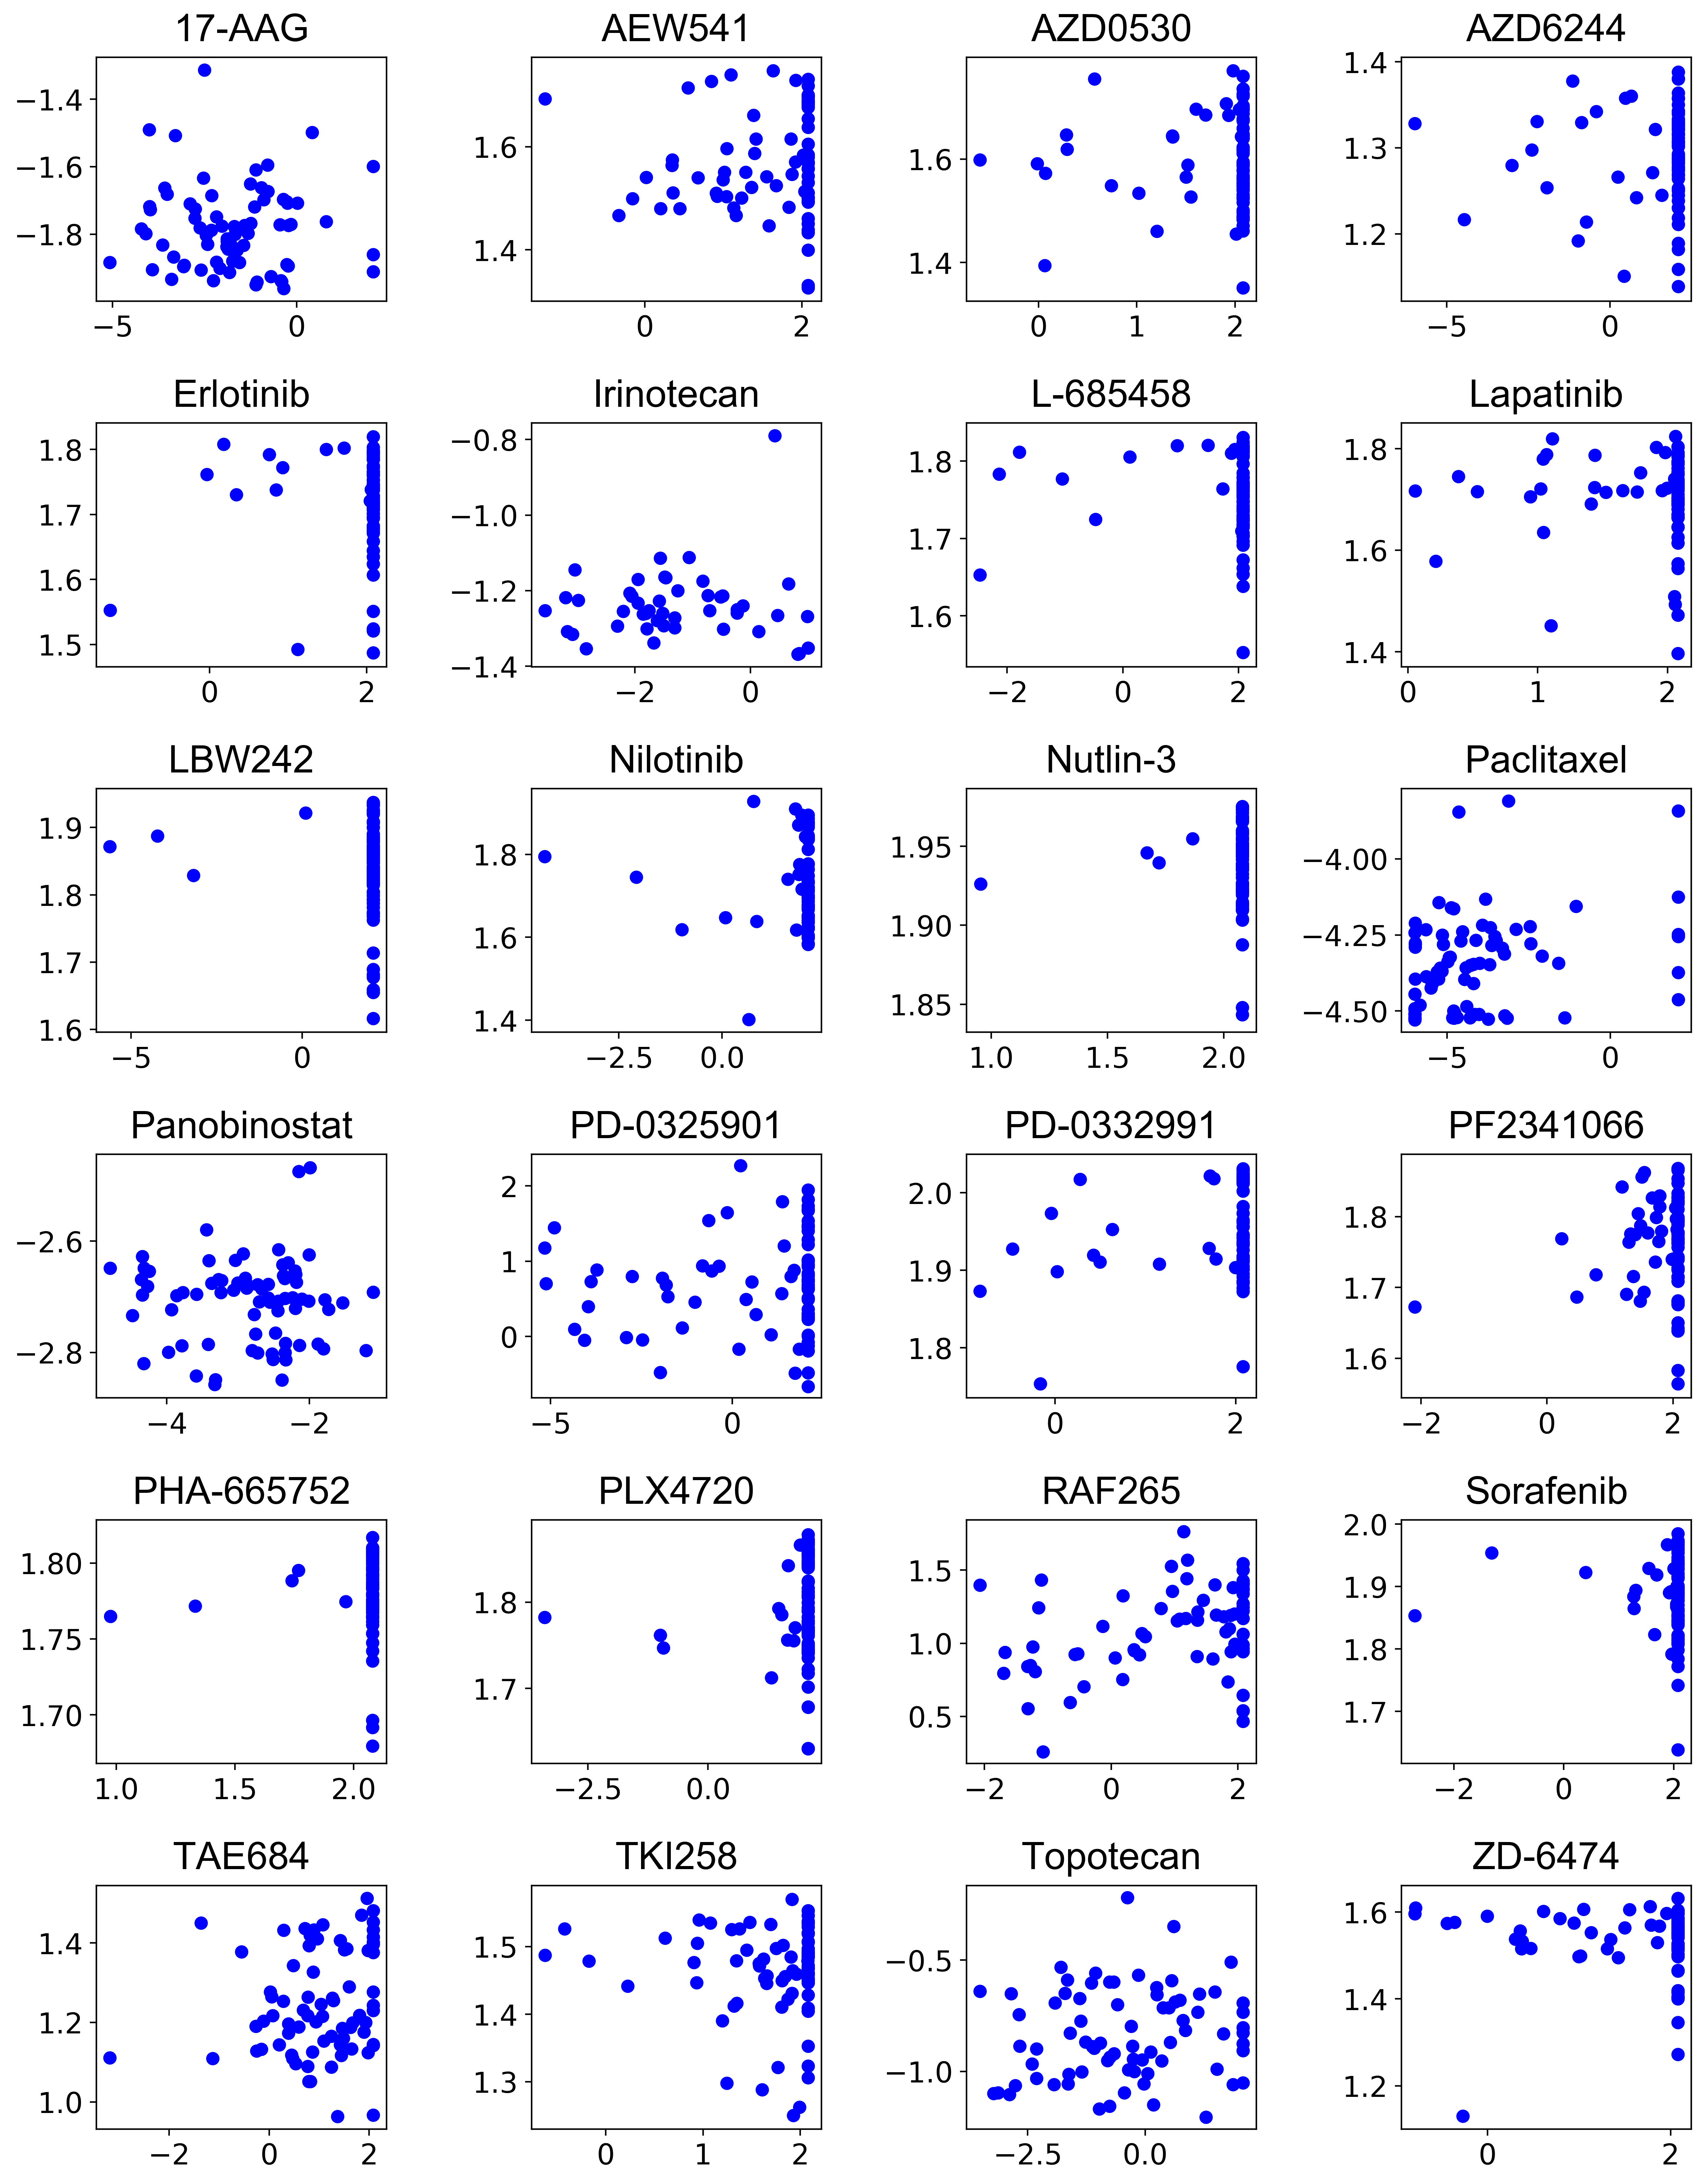

In [6]:
rmselist = []
r2list = []

# drug_list = ["Topotecan"]
fig = plt.figure(figsize=(15,20),dpi=400)
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for num in range(len(drug_list)):
    dname = drug_list[num]
    print('%s_//n' % dname)
    dataset = np.load(workdir + "//190509_ccle_mut_ic50_aron_%s.npz" % dname)
    x = dataset['x']
    y = dataset['y']
    train_X, test_X, train_y, test_y = train_test_split(x,y,test_size=0.2,random_state=42)
    
    train_X = train_X.reshape(train_X.shape[0], train_X.shape[1],1)
    test_X = test_X.reshape(test_X.shape[0], test_X.shape[1],1)
    
    train_X = train_X.astype('float32')
    test_X = test_X.astype('float32')
    print('train_X shape:', train_X.shape)
    print(train_X.shape[0], 'train samples')
    print(test_X.shape[0], 'test samples')
    
    # https://towardsdatascience.com/how-to-perform-lasso-and-lasso-regression-in-python-3b3b75541ad8
    # https://brunch.co.kr/@itschloe1/11
    StartTime8 = datetime.now()
    print("StartTime :", StartTime8)

    # In[10]:
    with K.tf.device('/GPU:0'):
        inputs = Input(shape=(train_X.shape[1],1),name='inputs')

        conv_cell_line_1 = Conv1D(filters=50, kernel_size=700, strides=5, activation='tanh')(inputs)
        maxpool_cell_line_1 = MaxPooling1D(pool_size=5)(conv_cell_line_1)
        conv_cell_line_2 = Conv1D(filters=30, kernel_size=5, strides=2, activation='relu')(maxpool_cell_line_1)
        maxpool_cell_line_2 = MaxPooling1D(pool_size=10)(conv_cell_line_2)
        flatten_cell_line = Flatten()(maxpool_cell_line_2)
        dense_cell_line = Dense(100, activation='relu')(flatten_cell_line)
        dropout_cell_line = Dropout(0.1)(dense_cell_line)

        dense_1 = Dense(300, activation='tanh')(dropout_cell_line)
        dropout_1 = Dropout(0.1)(dense_1)
        reshape_1 = Reshape((300, 1))(dropout_1)
        conv_1 = Conv1D(filters=30, kernel_size=150, strides=1, activation='relu')(reshape_1)
        maxpool_1 = MaxPooling1D(pool_size=2)(conv_1)
        conv_2 = Conv1D(filters=10, kernel_size=5, strides=1, activation='relu')(maxpool_1)
        maxpool_2 = MaxPooling1D(pool_size=3)(conv_2)
        conv_3 = Conv1D(filters=5, kernel_size=5, strides=1, activation='relu')(maxpool_2)
        maxpool_3 = MaxPooling1D(pool_size=3)(conv_3)
        dropout_2 = Dropout(0.1)(maxpool_3)
        flatten = Flatten()(dropout_2)
        dropout_3 = Dropout(0.2)(flatten)

        predictions = Dense(1, activation='linear')(dropout_3)



        model = Model(inputs=inputs, outputs=predictions, name='Test_v2_DNN20190327')
        model.compile(loss=keras.losses.mean_squared_error,
                      optimizer=keras.optimizers.Adam(learning_rate),
                      metrics=['mse','mae'])
    
    StartTime8 = datetime.now()
    print("StartTime :", StartTime8)
    with K.tf.device('/GPU:0'):
        model_train = model.fit(train_X, train_y, batch_size=batch_size,epochs=training_epochs,verbose=1,
                            validation_data=(test_X, test_y))

    EndTime8 = datetime.now()
    print("EndTime :", EndTime8)
    
    predicted_classes = model.predict(test_X)
    predicted_value = predicted_classes
        
    a = pd.DataFrame(predicted_value)
    b = pd.DataFrame(test_y)
    c = pd.concat([a,b], axis=1)
    c.columns=["Predicted","Test"]
    workdir = "E://Ronny_TF//DrugResponsivenessGuidelines//Experiments//191205_rerun//ResNet//Result//MC-9K_individual//CNN//one_drug_one_model"
    c.to_csv(workdir + '//%s_result.csv' % dname)
    
    
    rse = ((b[0]-a[0])**2).sum()
    mse = rse / len(b)
    rmse = np.sqrt(mse)
    print("%s’s final rmse value is = %f" % (dname,rmse))
    r2_value = r2_score(b,a)
    print("%s R-squared value is = %f" % (dname,r2_value))
    rmselist.append(rmse)
    r2list.append(r2_value)
          
    plt.subplot(6,4,num+1)
    plt.scatter(test_y,predicted_value,c='blue')
    plt.title(dname,fontdict ={'fontsize' : 20},fontname="Arial",y = 1.02)
    plt.tick_params(labelsize=15)
    
#     plt.scatter(test_y,predicted_value,c='red')
#     plt.xlabel('test_IC50_value')
#     plt.ylabel('predicted_IC50_value')
#     plt.savefig(workdir + '//%s_test_scatterplot.png' % dname)
    
    workdir = "E://Ronny_TF//DrugResponsivenessGuidelines//Experiments//191205_rerun//ResNet//MC-9K//Dataset//mut"
workdir = "E://Ronny_TF//DrugResponsivenessGuidelines//Experiments//191205_rerun//ResNet//Result//MC-9K_individual//CNN"

plt.savefig(workdir +'//191210_MC11K_one_drug_one_model_24drugs_CNN.png', dpi=400)
workdir = "E://Ronny_TF//DrugResponsivenessGuidelines//Experiments//191205_rerun//ResNet//MC-9K//Dataset//mut"

In [7]:
print("This is lasso regression with expression dataset for each drugs")
a = pd.DataFrame(drug_list)
b = pd.DataFrame(rmselist)
c =pd.DataFrame(r2list)
result = pd.concat([a,b,c],axis=1)
result.columns = ['Drug','RMSE','R2value']

This is lasso regression with expression dataset for each drugs


In [8]:
result

,Drug,RMSE,R2value
0,17-AAG,1.461247,-0.013100
1,AEW541,0.732134,0.003011
2,AZD0530,0.642114,-0.108986
3,AZD6244,1.629334,0.001885
4,Erlotinib,0.604337,-0.089049
5,Irinotecan,1.205960,-0.000724
6,L-685458,0.969956,-0.005687
7,Lapatinib,0.506095,-0.094081
8,LBW242,1.289669,-0.015488
9,Nilotinib,1.061168,-0.005850


In [9]:
workdir = "E://Ronny_TF//DrugResponsivenessGuidelines//Experiments//191205_rerun//ResNet//Result//MC-9K_individual//CNN"
result.to_csv(workdir +'//191212_MC9K_one_drug_one_model_CNN_24drugs_metrics.csv')